# <center>Multi-class Classification and Neural Networks</center>

Implement one-vs-all logistic regression and neural networks to recognize hand-written digits

## Implement one-vs-all logistic regression

Implement one-vs-all logistic regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
import scipy.optimize as op

Load data from a matlab file. The data is in the dictionary format with X representing 5000 20x20 pixel images in a 5000 x 400 matrix and y representing the number corresponding to the image in 5000 x 1 vector.

In [2]:
pixelsmat = scipy.io.loadmat('ex3data1.mat')
print(pixelsmat.keys())
X = pixelsmat['X']
y = pixelsmat['y']
print(X.shape, y.shape)

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
(5000, 400) (5000, 1)


Check the different classes in our dataset

In [3]:
print("Different classes", set(y.reshape(y.shape[0])))
num_classes = len(set(y.reshape(y.shape[0])))
print("Total number of classes", num_classes)

Different classes {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
Total number of classes 10


For convinience, lets replace class '10' by class '0', as indexing in python starts from 0

In [4]:
y = np.where(y == 10, 0, y)
print("Different classes", set(y.reshape(y.shape[0])))

Different classes {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


Initialize the number of pixels variable

In [5]:
numpixels1d = X.shape[1]
numpixels2d = int(np.sqrt(numpixels1d))
print(numpixels1d, numpixels2d)

400 20


Visualize images using randomly selected 100 rows from X matrix. The image can be displayed using imshow function available in matplotlib library.

In [6]:
num_img = 100
rows = cols = int(np.sqrt(100))
indices = np.random.randint(0,5000, size=100)

In [7]:
imgArr = np.zeros((num_img, numpixels1d))
for i in range(np.size(indices)):
    imgArr[i] = X[indices[i]]

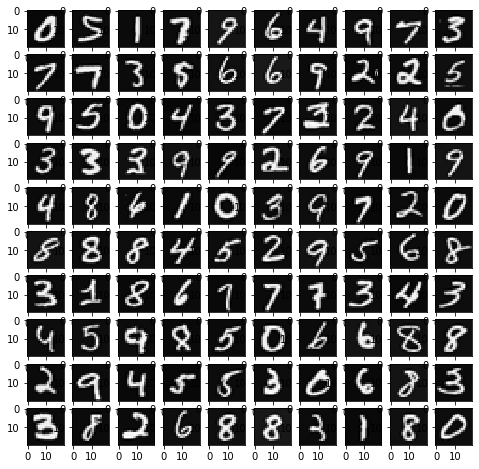

In [8]:
fig = plt.figure(figsize=(8, 8))
for i in range(1, np.size(indices)+1):
    img = imgArr[i-1].reshape(numpixels2d, numpixels2d)
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.T, cmap='gray', origin="upper")
plt.show()

### Vectorized Logistic Regression

Implement a vectorized regularized logistic regression  avoiding any "for loops" to make it efficient.
Cost function for logistic regression
$$ J(\theta) = \frac{1}{m}\sum_{i=1}^m[-y^{(i)}log(h_\theta(x^{(i)})) - (1 - y^{(i)})log(1 - h_\theta(x^{(i)})] + \frac{\lambda}{2m}\sum_{j=1}^n\theta_j^2 $$
The logistic regression hypothesis is defined as
$$ h_\theta(x) = g(\theta^Tx) $$
where g is the Sigmoid function
$$ g(z) = \frac{1}{1 + e^{-z}} $$

#### Vectorizing the cost function

Use the notion that $\theta^TX = X^T\theta$

Initialize X1 to have a column 1 vector (bias vector) to be appended at beginning and y_set to contain unique classes

In [9]:
y_set = set(y.reshape(y.shape[0]))
X1 = np.hstack((np.ones((X.shape[0], 1)), X))
print("X1 shape", X1.shape)
num_samples = X1.shape[0]
num_features = X1.shape[1]

X1 shape (5000, 401)


In [10]:
def sigmoid(z):
    return (1/(1+(np.exp(-z))))

In [11]:
def computecostreg(theta, X, y, l):
    # Reshape the theta vector into 2D array 
    theta = theta.reshape((num_features,1))
    
    # Compute hypothesis
    yhat = sigmoid(X.dot(theta))
    
    # Compute the cost value
    #cost_a = y * np.log(yhat)
    #cost_b = (1 - y) * np.log(1 - yhat)
    #cost = (np.sum(cost_a) + np.sum(cost_b))/(-X.shape[0])
    cost = (y.T.dot(np.log(yhat)) + (1-y).T.dot(np.log(1 - yhat)))/(-num_samples)
    
    theta_sub = theta[1:,:]
    #regparam = np.sum(theta_sub * theta_sub)
    regparam = theta_sub.T.dot(theta_sub)
    cost += (regparam * l)/(2 * num_samples)
    return cost  

#### Vectorizing the gradient

Use the optimization method in scipy library. This needs the Cost Funcion, Gradient function , $\theta$, X and y values as parameters.
The gradient function for regularized logistic regression
for j  = 0 $$Gradient = \frac{1}{m}\sum_{i=1}^m[(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}]$$
for j >= 1 $$Gradient = \frac{1}{m}\sum_{i=1}^m[(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}] + \frac{\lambda}{m}\theta_j $$

In [12]:
def gradientreg(theta, X, y, l):
    # Reshape the theta vector into 2D array
    theta = theta.reshape((num_features,1))
    
    # Compute hypothesis
    yhat = sigmoid(X.dot(theta))
    
    # Compute error vector
    diff = yhat - y
    
    # Compute gradient and return it in 1D format
    grad = (X.T.dot(diff))/(num_samples)
    theta_sub = theta[1:,:]
    grad[1:,:] += (theta_sub * l)/(num_samples)
    return grad.flatten()

Use the optimization method in scipy library.

In [13]:
l = 1
init_theta = np.zeros(X1.shape[1])
optimal_theta = np.zeros((num_classes, num_features))
for i in y_set:
    y_i = (y == i)
    print("Finding theta values for", i)
    Result = op.minimize(fun = computecostreg, 
                                     x0 = init_theta, 
                                     args = (X1, y_i, l),
                                     method = 'TNC',
                                     jac = gradientreg);
    optimal_theta[i] = Result.x;
    #Result = op.fmin_tnc(func=computecostreg, x0=init_theta, fprime=gradientreg, args=(X1, y_i, l))
    #optimal_theta[ind] = Result[0];
for i in y_set:
    y_i = (y == i)
    print("final cost", computecostreg(optimal_theta[i].reshape((num_features, 1)), X1, y_i, l))

Finding theta values for 0
Finding theta values for 1
Finding theta values for 2
Finding theta values for 3
Finding theta values for 4
Finding theta values for 5
Finding theta values for 6
Finding theta values for 7
Finding theta values for 8
Finding theta values for 9
final cost [[0.02014754]]
final cost [[0.02696008]]
final cost [[0.06844193]]
final cost [[0.07170591]]
final cost [[0.05205027]]
final cost [[0.07685827]]
final cost [[0.03478613]]
final cost [[0.04672434]]
final cost [[0.09274595]]
final cost [[0.08931062]]


Redoing the same exercise using in-built Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=True, C = 1e15, solver='saga')
clf.fit(X, y.ravel())

optimal_theta2 = np.hstack((clf.intercept_.reshape(num_classes,1), clf.coef_))
print("optimal_theta shape", optimal_theta2.shape)

optimal_theta shape (10, 401)


C:\Users\arajendran\miniconda3\envs\PyMLEnv\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


#### Calculate the accuracy of the weights on the training set. Use One-vs-all Prediction.

In [15]:
def predictNumber(theta, X):
    yhat = sigmoid(X.T.dot(theta))
    return yhat

In [16]:
def calcaccuracy(optimal_theta_arr):
    count = 0
    for i in range(num_samples):
        max_prob = 0
        for j in range(optimal_theta_arr.shape[0]):
            prob_j = predictNumber(optimal_theta_arr[j].reshape((num_features, 1)), X1[i].reshape((num_features, 1)))
            if(j == 0 or (prob_j > max_prob)):
                max_prob = prob_j
                out_class = j
        if(y[i,0] == out_class): count += 1
    print("Accuracy is {:%}".format(count/num_samples))

In [17]:
calcaccuracy(optimal_theta)

Accuracy is 94.460000%


## Neural Networks

The neural network will be able to represent complex models that form non-linear hypotheses. To do this using multi-class logistic regression, more features (Polynomial Features) would have to be added and this makes the process more expensive.</br>
This assignment will use already predicted parameters from a neural network that we have already trained.</br>
Goal is to implement the feedforward propagation algorithm to use our weights for prediction.</br>
In next week's exercise, you will write the backpropagation algorithm for learning the neural network parameters.

<img src="NeuralNetworkModel.png">

Load data from a matlab file. The data is in the dictionary format with Theta1 representing weights to map input layer to hidden layer and Theta2 representing weights to map hidden layer to output layer.</br>
Input layer as 401 units representing 400 features for 20x20 pixels and one bias unit. Hidden Layer has 25 units plus one bias unit. Output layer has 10 units for 10 classes in our original dataset.</br>

In [18]:
weightsmat = scipy.io.loadmat('ex3weights.mat')
print(weightsmat.keys())
Theta1 = weightsmat['Theta1']
Theta2 = weightsmat['Theta2']
print(Theta1.shape, Theta2.shape)

dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])
(25, 401) (10, 26)


Define function for forward propagation and then compute prediction for all samples and the accuracy of the model.

In [19]:
def fwdpropgate(theta, x):
    z = theta.dot(x)
    a = sigmoid(z)
    return a

In [20]:
bias = np.array([[1]])
out_arr = np.zeros(((num_samples, 1)))
count = 0
for i in range(num_samples):
    a2 = fwdpropgate(Theta1, X1[i].reshape(num_features, 1))
    a2 = np.concatenate((bias, a2))
    a3 = fwdpropgate(Theta2, a2)
    max_ind = np.argmax(a3)
    max_ind = (max_ind+1)%10
    if(y[i,0] == (max_ind)): count += 1
print("Accuracy is {:%}".format(count/num_samples))

Accuracy is 97.520000%
